Task : Implement the logistic function by completing the code.

In [3]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y


In [4]:
import numpy as np
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
    # Test with numpy array input
x_array = np.array([0, 2, -3])
expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals # Use np.round to round the array element-wise and compare
assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
print("All tests passed!")
# Run the test case
test_logistic_function()


All tests passed!


Explanation of the test cases:

Scalar input test: We check if the function gives the correct output for a scalar input (e.g., 0, 2, -3).

Numpy array test: We verify that the function can handle a numpy array as input and return the correct element-wise logistic function values.

Assertions: np.isclose and np.allclose are used for comparison to avoid issues with floating-point precision errors.

Running this test will check that the function works for both scalar and array inputs and ensures the correctness of the output values.

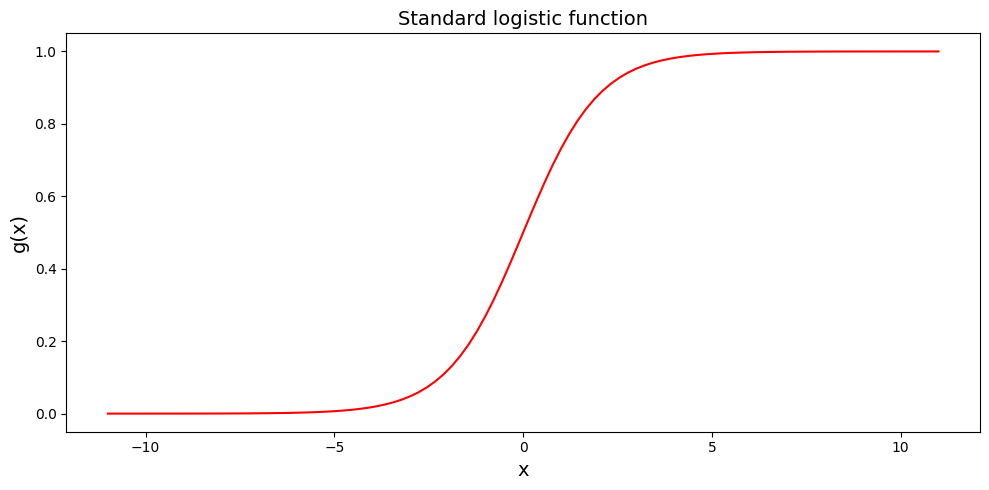

In [5]:
# Plooting the sigmoid function:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 5))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic_function(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

In [7]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}. Arguments:
y_true (scalar): true target value {0 or 1}.
y_pred (scalar): predicted taget value {0-1}.
Returns:
loss (float): loss/error value
"""
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)

  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [8]:
# Test function:
y_true, y_pred = 0, 0.1
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


SyntaxError: invalid syntax (ipython-input-2286039680.py, line 8)

In [9]:
def test_log_loss():
  """
  Test cases for the log_loss function.
"""
  import numpy as np
  # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction ( y_true=1, y_pred=1)"
  # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction ( y_true=0, y_pred=0)"

  # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
  # With clipping, log_loss returns a large number, not an error.
  y_true = 1
  y_pred = 0
  # Expected loss when y_pred is clipped to 1e-10
  expected_loss_clipped_high = -np.log(1e-10) # For y_true = 1, y_pred = ~0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss_clipped_high, atol=1e-5), "Test failed for incorrect prediction (y_true=1, y_pred=0) with clipping"

  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  # With clipping, log_loss returns a large number, not an error.
  y_true = 0
  y_pred = 1
  # Expected loss when y_pred is clipped to 1 - 1e-10
  expected_loss_clipped_high = -np.log(1e-10) # For y_true = 0, y_pred = ~1
  assert np.isclose(log_loss(y_true, y_pred), expected_loss_clipped_high, atol=1e-5), "Test failed for incorrect prediction (y_true=0, y_pred=1) with clipping"

  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for partially correct prediction"

  # Test case 6: Another partially correct prediction
  y_true = 0
  y_pred = 0.3
  expected_loss = -(1 * np.log(1 - 0.3)) # ~0.3566
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for another partially correct prediction"

  print("All log_loss tests passed!")

# Run the test case
test_log_loss()

All log_loss tests passed!


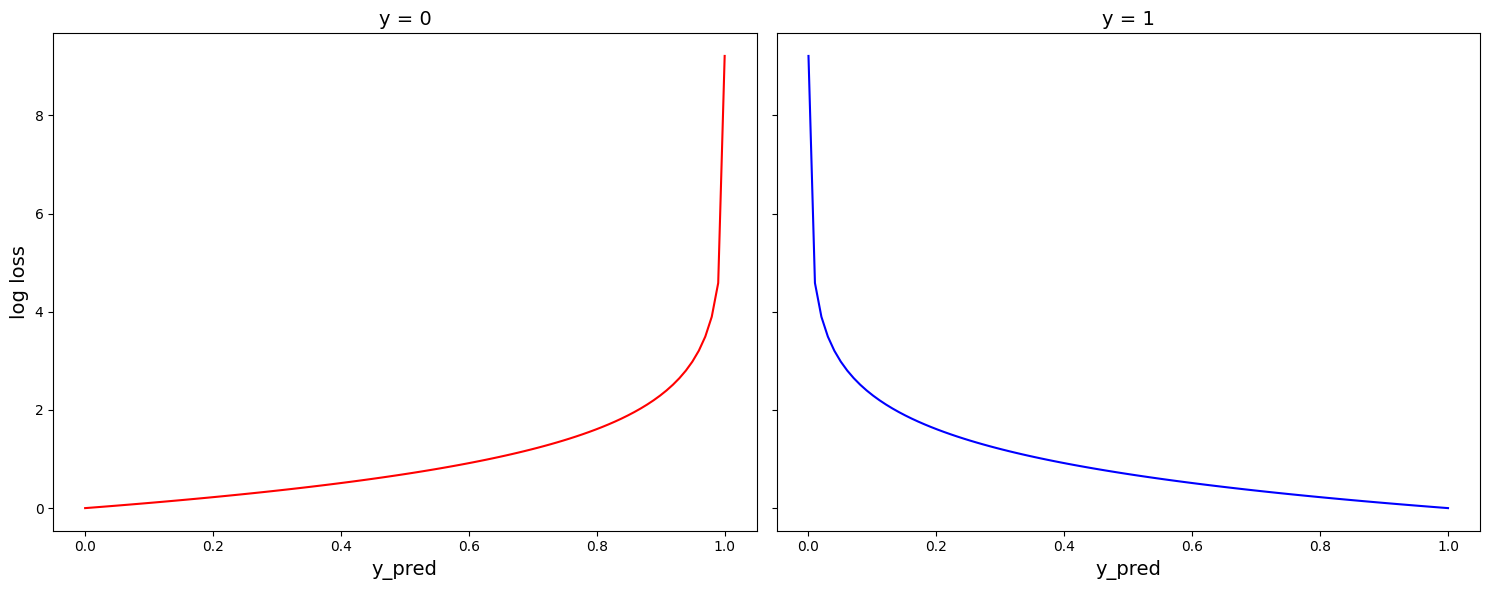

In [10]:
# Plot the loss Function:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, [log_loss(0, yp) for yp in y_pred], color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, [log_loss(1, yp) for yp in y_pred], color = 'blue')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

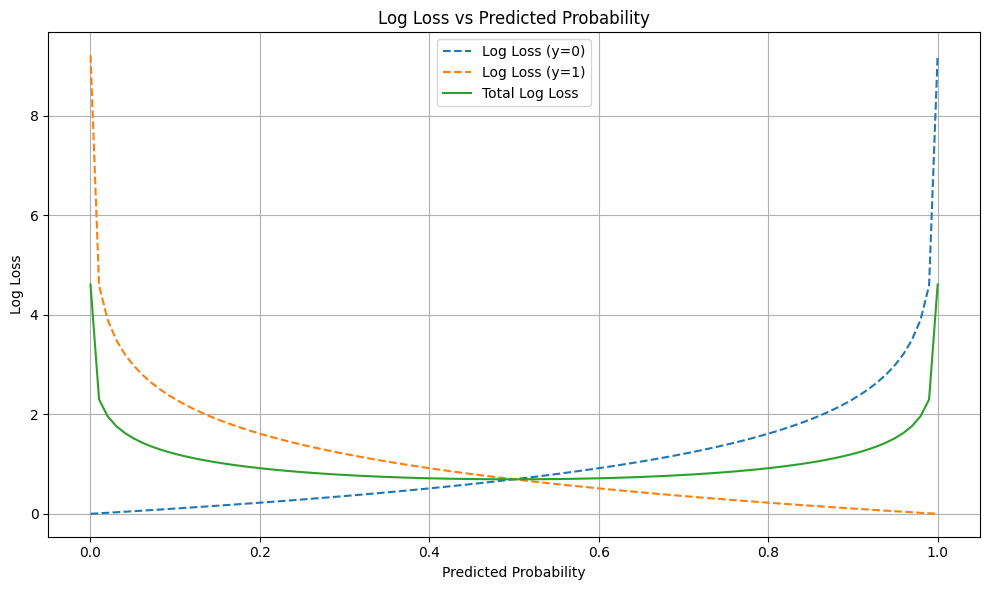

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predicted probabilities
y_pred = np.linspace(0.0001, 0.9999, 100)

# Log loss for y = 0 and y = 1
log_loss_0 = -np.log(1 - y_pred)
log_loss_1 = -np.log(y_pred)

# Total log loss (equal weights)
total_log_loss = 0.5 * log_loss_0 + 0.5 * log_loss_1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_pred, log_loss_0, linestyle="--", label="Log Loss (y=0)")
plt.plot(y_pred, log_loss_1, linestyle="--", label="Log Loss (y=1)")
plt.plot(y_pred, total_log_loss, label="Total Log Loss")

plt.title("Log Loss vs Predicted Probability")
plt.xlabel("Predicted Probability")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import numpy as np

# For the first assert statement
y_true = 1
y_pred = 0.8
expected_loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

# For the second assert statement
y_true = 0
y_pred = 0.2
expected_loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

print("All tests passed in this cell!")


All tests passed in this cell!


In [13]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1) Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    import numpy as np
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)

    # Ensure y_true and y_pred are numpy arrays for iteration and operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate individual log losses using the existing log_loss function for each pair
    # The log_loss function (as implemented) will handle clipping and return a scalar for each pair.
    loss_vec = np.array([log_loss(yt, yp) for yt, yp in zip(y_true, y_pred)])

    # The cost is the mean of these individual losses
    cost = np.mean(loss_vec)
    return cost

In [14]:
import numpy as np

# Test function for the cost_function
def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Expected output: Manually calculate cost for these values
    # log_loss(y_true, y_pred) for each example
    expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                     -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                     -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

    # Call the cost_function to get the result
    result = cost_function(y_true, y_pred)

    # Assert that the result is close to the expected cost with a tolerance of 1e-6
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

# Run the test case
test_cost_function()

Test passed for simple case!


In [15]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b  # Matrix-vector multiplication and adding bias

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


In [16]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.dot(np.ones(n), (y_pred - y)) / n  # Gradient w.r.t bias, scalar

    return grad_w, grad_b

In [17]:
# Simple test case
X = np.array([[10, 20], [-10, 10]])  # shape (2, 2)
y = np.array([1, 0])  # shape (2,)
w = np.array([0.5, 1.5])  # shape (2,)
b = 1  # scalar

# Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [18]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Shape (2,) - same as number of features
b = 0.0                                  # Scalar
alpha = 0.1                              # Learning rate
n_iter = 100000                           # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

In [19]:
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
    y = np.array([1, 0]) # Shape (2,)
    w = np.zeros(X.shape[1]) # Shape (2,)
    b = 0.0 # Scalar
    alpha = 0.1 # Learning rate
    n_iter = 100 # Number of iterations
    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,
    show_params=False)
    # Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
    print("All tests passed!")
# Run the test
test_gradient_descent()

All tests passed!


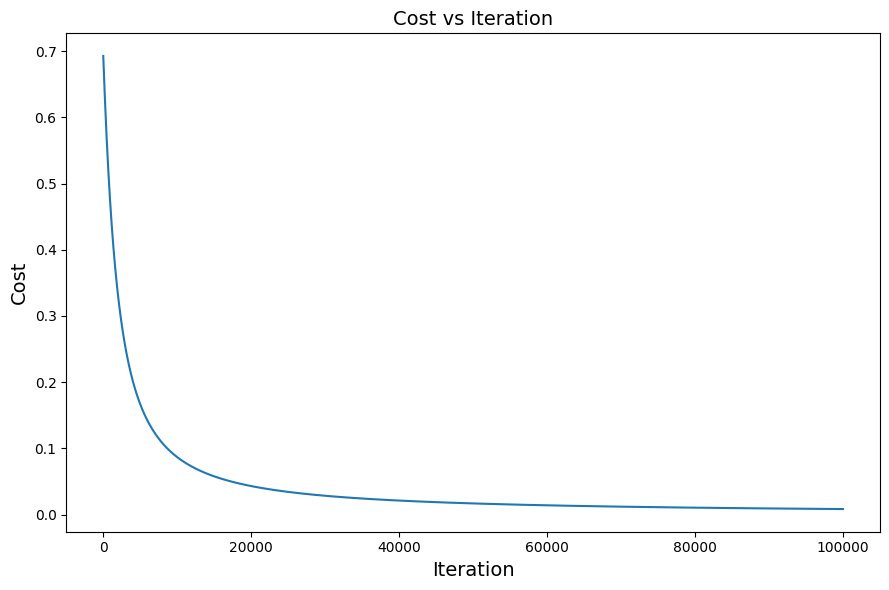

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
    X (ndarray, shape (n,d)): Test features
    w (ndarray, shape (d,)): Weights
    b (float): Bias
    threshold (float): Classification threshold

    Returns:
    y_pred (ndarray, shape (n,)): Predicted class labels (0 or 1)
    """

    # Linear combination: z = Xw + b
    z = np.dot(X, w) + b

    # Logistic (sigmoid) function
    y_test_prob = 1 / (1 + np.exp(-z))

    # Apply threshold to get class labels
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [22]:
import numpy as np

def test_prediction():
    X_test = np.array([
        [0.5,  1.0],
        [1.5, -0.5],
        [-0.5, -1.0]
    ])  # Shape (3, 2)

    w_test = np.array([1.0, -1.0])  # Shape (2,)
    b_test = 0.0                    # Scalar bias
    threshold = 0.5

    # Expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assertion
    assert np.array_equal(y_pred, expected_output), \
        f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

test_prediction()

Test passed!
